# CQF Exam 3

## January 2024 Cohort

## Task 1

What is the cost function of Logistic Regression? Explain in Detail.

**Answer**: This follows mostly [1] (p. 7-10, 25-26) and [2].

Logistic regression is one of the most used machine learning methods for classification mapping qualitative data onto categorical variables, e.g. either 0 or 1. The cost function derived for logistic regression is the so-called Binary Cross Entropy cost function and can be derived as follows:

#### 1. Logistic probability predictor via logit function
To model the probability $p$ of the classification mapping to 1, we can invert the logit function that converts log-odds to probabilities $$logit(p) = \log\left(\frac{p}{1 - p}\right)=z,$$ solving for $$p=\frac{1}{1 + e^{-z}}=:\sigma(z).$$ This so-called sigmoid function can be used to model probabilities as it yields values between 0 and 1, as can seen per plot below:

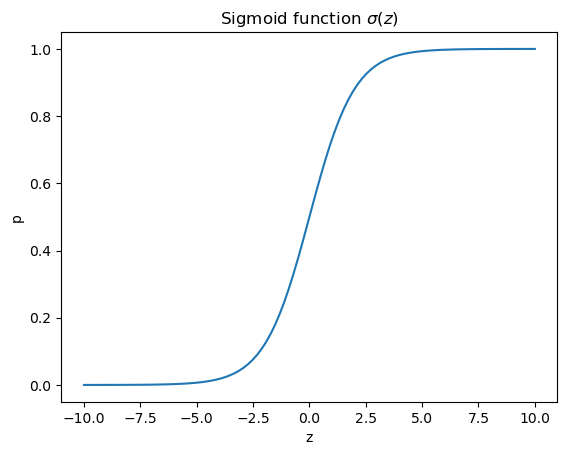

In [1]:
import numpy as np
import matplotlib.pyplot as plt


def sigmoid(z):
    return 1 / (1 + np.exp(-z))

z = np.linspace(-10, 10, 100)
p = sigmoid(z)

plt.figure()
plt.plot(z, p)
plt.title('Sigmoid function $\sigma(z)$')
plt.xlabel('z')
plt.ylabel('p')
plt.show()

Now, the predictor function for a training data point $(x,y)$ is given by the sigmoid function applied to the linear combination of input features:
$$\hat{y}=P(Y=1|X=x) = \sigma(\mathbf{w}\cdot\mathbf{x}).$$

#### 2. Probability of the output $y$
For a given input $x$ and its corresponding label $y$:
$$P(Y=y|X=x)=
\begin{cases}
\hat{y} = \sigma(\mathbf{w}\cdot\mathbf{x}) & \text{if } y=1\\
1-\hat{y} = 1-\sigma(\mathbf{w}\cdot\mathbf{x}) & \text{if } y=0.
\end{cases}$$

#### 3. Bernoulli distribution
If $y$ can either take values 0 or 1, then $Y \sim \text{Ber}(p)$ follows a Bernoulli distribution with $p = \sigma(\mathbf{w} \cdot \mathbf{x})$. Hence:
\begin{align*}
P(Y=y|X=x) &=p^y \cdot (1-p)^{(1-y)}\\
&=\sigma(\mathbf{w}\cdot\mathbf{x})^y \cdot \left(1-\sigma(\mathbf{w}\cdot\mathbf{x})\right)^{(1-y)}\\
&=\hat{y}^y \cdot \left(1-\hat{y}\right)^{(1-y)}
\end{align*}

#### 4. Log-likelihood
Taking the natural logarithm of the probability of the above and applying logarithm laws yields
$$\log P(Y=y|X=x) = y\log(\hat{y}) + (1-y)\log(1-\hat{y}).$$

#### 5. Cost function for one training data point $(x,y)$
To convert this problem into a minimization problem, we consider the negative of the log-likelihood. For a single training example $(x,y)$, we obtain the cost function:
$$L(\hat{y}, y) = -\log P(y|x) = -\left(y\log(\hat{y}) + (1-y)\log(1-\hat{y})\right)$$

#### 6. Cost function for the entire dataset
To get the cost function for the entire training dataset, we sum over all training examples and take the average. If we have $n$ training examples, the cost function called the *Binary Cross Entropy function* is then obtained as
\begin{align*}
J(\mathbf{w}) &= -\frac{1}{n}\sum_{i=1}^{n} \left( y^{(i)}\log(\hat{y}^{(i)}) + (1-y^{(i)})\log(1-\hat{y}^{(i)})\right)\\
 &= -\frac{1}{n}\sum_{i=1}^{n} \left( y^{(i)}\log(\sigma(\mathbf{w}\cdot x^{(i)})) + (1-y^{(i)})\log(1-\sigma(\mathbf{w}\cdot x^{(i)}))\right)\\
 &= -\frac{1}{n}\sum_{i=1}^{n} \left( y^{(i)}\log(\hat{p}^{(i)}) + (1-y^{(i)})\log(1-\hat{p}^{(i)})\right)
\end{align*}

This cost function is minimized to train the logistic regression model, leading to optimal parameters $\mathbf{w}$ that best fit the training data. Since the function is convex, we can use gradient descent to find the global minimum.

## Task 2

What are voting classifers in ensemble learning?

## Task 3: Short-term asset return prediction

Follow the 7-steps to model building for your selected ticker,

* (a) produce a model to predict positive moves (up trend) using Support Vector Machine (SVM) model.
* (b) tune hyperparameters for the estimator and present the best model.
* (c) investigate the prediction quality using area under ROC curve, confusion matrix and classification report.

## References

* [1]: JA244.5: Lecture Notes on Supervised Learning II by Kannan Singaravelu, CQF Faculty
* [2]: JA24P10: CQF Python Labs on Trend prediction using Logistic Regression by Kannan Singaravelu
* [3]: Willmott, Paul - _Paul Willmott on Quantitative Finance_, Second Edition, Volume 2, p. 427-452, Wiley, 2006
* [4]: JA243.5: Lecture Notes on Exotic Options by Dr. Riaz Ahmad, CQF Faculty, Head of Faculty
* [5]: [Matplotlib documentation](https://matplotlib.org)